# An Examination of Trends in Film



<img src="hollywood.png" alt="Hollywood Sign" style="height:500px;width:800px;">

## Introduction

A journey to any theater to view a film, in a pre-pandemic world, was an experience for anyone willing. Take the time to immerse yourself in another world, another time, or another romance and let the world outside of the air conditioned screening rooms just melt away. These experiences can break ennui, provide artistic fulfillment, and be fun. 

On the other hand, however, film is a business. According to Forbes, in 2019 the film industry surpassed [$100 Billion USD](https://www.forbes.com/sites/rosaescandon/2020/03/12/the-film-industry-made-a-record-breaking-100-billion-last-year/#1e22642e34cd) in earnings. Therefore, if a formula can be cracked - or even a new formula devised - certain entities could stand to take a decent slice of this proverbial pie. 

We have selected the previous decade of film minus the current year due to industry changes related to the pandemic. This provides a relevant look at the film industry. Following this logic we have chose to focus on films produced domestically, but with international considerations. 

## Points of Analysis

### Optimal Budget

# Data Retrieval

## Libraries and Data Retrieval 

### Library Importations

In [981]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tmdbsimple as tmdb
import requests
from tqdm.notebook import tqdm
import pprint
import time
import csv

%matplotlib inline

f = open('C:/Users/Nero_/apikeys/tmdb.txt', 'r')
key = f.readline()

tmdb.API_KEY = key

pp = pprint.PrettyPrinter(indent=2)

### Datasets and Retrieval

In [2]:
## Creating an ID list to scrape with
discover = tmdb.Discover()

id_list = []

## For loop scrapes 500 pages of data to return the tmdb id of each
## entry for later use in scraping
for pages in tqdm(range(1,501), desc='ID Append'):
    page = discover.movie(language='en-US', sort_by='revenue.desc', page=pages, 
                          certification_country='US', certification_lte='NC-17', 
                          certification_gte='G', primary_release_date_gte='2010-01-01', 
                          with_original_language='en')
    for film in page['results']:
        id_list.append(film['id'])
    time.sleep(.16)

In [3]:
## Movie info scraping function
def movie_info(list_id):
    ## Pulling tmdbsimple object methods and passing them into variables
    movie = tmdb.Movies(list_id).info()
    ratings = tmdb.Movies(list_id).release_dates()
    
    ## Search ratings variables for MPAA certification
    iso = 'iso_3166_1'
    for result in ratings['results']:
        if result[iso] == 'US':
            if result['release_dates'][0]['certification'] == '':
                rating = result['release_dates'][1]['certification']
            else: 
                rating = result['release_dates'][0]['certification']
    ## Sleep timer = No accidental DDoS
    time.sleep(.05)
    
    ## Dictionary to catch and store information requested
    movie_dict = {
        'title': movie['original_title'],
        'release_date': movie['release_date'],
        'rating': rating,
        'imdb_id': movie['imdb_id'],
        'tmbd_id': movie['id'],
        'runtime': movie['runtime'],
        'genres': [[genre.get('name') for genre in movie['genres']]],
        'budget': movie['budget'],
        'revenue': movie['revenue']
    }
    
    return movie_dict

In [4]:
## Scraping loop

## Initialize the list of dicts to store scraped data
film_dict = []

## For loop used to scrape using the scraping function with error handling for
## cases of HTTP errors.
for movie in tqdm(id_list):
    try:
        film_dict.append(movie_info(movie))
    except:
        film_dict.append('Missing')

In [31]:
## Remove any missing entires in the list as well as removing
## empty values in two strings of the movie information

miss = 'Missing'
for count, film in enumerate(test_film):
    if film == miss:
        film_dict.pop(count)
    if film_dict[count]['rating'] == '':
        film_dict.pop(count)
    if film_dict[count]['imdb_id'] == '':
        film_dict.pop(count)

In [551]:
## Convert the list of movie dicts into a pandas dataframe
film = pd.DataFrame.from_records(film_dict)

In [552]:
## Convert the release_date column from an object (string) to a datetime object
film['release_date'] = pd.to_datetime(film['release_date'])

In [917]:
## Bring in previously scraped data and convert to dataframe
bomFrame = pd.read_csv('Scraper_test.csv')
bom_frame = pd.DataFrame(bomFrame)

In [918]:
## Removing unwanted zero values from the dataframe to provide a clearer picture
## of the data. 

## Working with a copy to protect the original from transformative work
film_copy = film.copy()

## Removing the unwanted zero values from budget, revenue, and runtime
indexNames = film_copy[film_copy['budget'] == 0].index
film_copy.drop(indexNames, inplace=True)
revenueNames = film_copy[film_copy['revenue'] == 0].index
film_copy.drop(revenueNames, inplace=True)
runtimeNames = film_copy[film_copy['runtime'] == 0].index
film_copy.drop(runtimeNames, inplace=True)

## Casting the tmbd_id as str to avoid any mathematical operations during
## further analysis steps.
film_copy['tmbd_id'] = film_copy['tmbd_id'].apply(str)
film_copy.drop(['revenue'], axis=1, inplace=True)

## Check the data for correct operations
print(film_copy.info())
display(film_copy.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1717 entries, 0 to 2184
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   title         1717 non-null   object        
 1   release_date  1717 non-null   datetime64[ns]
 2   rating        1717 non-null   object        
 3   imdb_id       1694 non-null   object        
 4   tmbd_id       1717 non-null   object        
 5   runtime       1717 non-null   float64       
 6   genres        1717 non-null   object        
 7   budget        1717 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 120.7+ KB
None


,title,release_date,rating,imdb_id,tmbd_id,runtime,genres,budget
0,Avengers: Endgame,2019-04-24,PG-13,tt4154796,299534,181.0,"[[Adventure, Science Fiction, Action]]",356000000
1,Star Wars: The Force Awakens,2015-12-15,PG-13,tt2488496,140607,136.0,"[[Action, Adventure, Science Fiction, Fantasy]]",245000000
2,Avengers: Infinity War,2018-04-25,PG-13,tt4154756,299536,149.0,"[[Adventure, Action, Science Fiction]]",300000000
3,Jurassic World,2015-06-06,PG-13,tt0369610,135397,124.0,"[[Action, Adventure, Science Fiction, Thriller]]",150000000
4,The Lion King,2019-07-12,PG,tt6105098,420818,118.0,"[[Adventure, Family, Music]]",260000000


In [919]:
## Merging the partially cleaned film dataframe and the previously scraped data
merge = pd.merge(left=film_copy, right=bom_frame, left_on='title', right_on='Title')

In [920]:
## Dropping unwanted values from the newly merged dataset

## Dropping the extra Title column
merge = merge.drop(['Title'], axis=1)

## Removing zero and extraneous values from the newly merged dataframe
mergeRuntimes = merge[merge['runtime'] == 0].index
merge.drop(mergeRuntimes, inplace=True)
mergeOpen = merge[merge['Number_of_Opening_Theaters'] == '('].index
merge.drop(mergeOpen, inplace=True)
mergeOpen = merge[merge['Number_of_Opening_Theaters'] == 0].index
merge.drop(mergeOpen, inplace=True)
mergeBudget = merge[merge['budget'] == 0].index
merge.drop(mergeBudget, inplace=True)

In [921]:
## Casting the tmbd_id, runtime, and Number_of_Opening_Theaters columns
## as more useful datatypes for analysis.
merge = merge.astype({'tmbd_id':'object', 'runtime':'int64','Number_of_Opening_Theaters':'int64'})

In [922]:
## Dropping doubles that may have been introduced in the merge
merge = merge.sort_values('imdb_id', ascending=False)
merge = merge.drop_duplicates(subset='imdb_id', keep='first')

In [923]:
## Feature engineering
## Creating a profit column from Worldwide_Gross - budget
merge['Profit'] = merge['Worldwide_Gross'] - merge['budget']

In [924]:
## Checking the newly created column
merge

,title,release_date,rating,imdb_id,tmbd_id,runtime,genres,budget,Domestic_Gross,International_Gross,Worldwide_Gross,Opening_Gross,Number_of_Opening_Theaters,Profit
1174,Playing with Fire,2019-11-08,PG,tt9134216,554241,96,"[[Comedy, Family]]",29900000,44451847,24179822,68631669,12723781,3125,38731669
331,Knives Out,2019-11-27,PG-13,tt8946378,546554,131,"[[Mystery, Thriller, Comedy, Drama, Crime]]",40000000,165363234,143869563,309232797,26769548,3461,269232797
1142,Midsommar,2019-07-03,R,tt8772262,530385,148,"[[Horror, Drama, Mystery]]",9000000,27426361,20437004,47863365,6560030,2707,38863365
1151,21 Bridges,2019-10-24,R,tt8688634,535292,99,"[[Crime, Action, Drama]]",33000000,28539757,21400000,49939757,9261268,2665,16939757
1170,Child's Play,2019-06-19,R,tt8663516,533642,90,[[Horror]],10000000,29208403,15693834,44902237,14094594,3007,34902237
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1387,The Rum Diary,2011-10-13,R,tt0376136,23514,120,"[[Drama, Comedy]]",45000000,13109815,17025143,30134958,5135369,2273,-14865042
2,Jurassic World,2015-06-06,PG-13,tt0369610,135397,124,"[[Action, Adventure, Science Fiction, Thriller]]",150000000,652270625,1018130012,1670400637,208806270,4274,1520400637
1090,A Walk Among the Tombstones,2014-09-18,R,tt0365907,169917,113,"[[Crime, Drama, Mystery, Thriller]]",28000000,26307600,32526784,58834384,12758780,2712,30834384
519,The Secret Life of Walter Mitty,2013-12-18,PG,tt0359950,116745,114,"[[Adventure, Comedy, Drama, Fantasy]]",90000000,58236838,129896484,188133322,12765508,2909,98133322


# Data Analysis

### Exploratory Data Analysis

After very minor feature engineering to pull out a basic profit calculation of each film by subtracting the `budget` from the `Worldwide_Gross` in the retrieval and cleaning process.

It is a good idea to look at the various values and to take note of any correlations between the values of the data. 

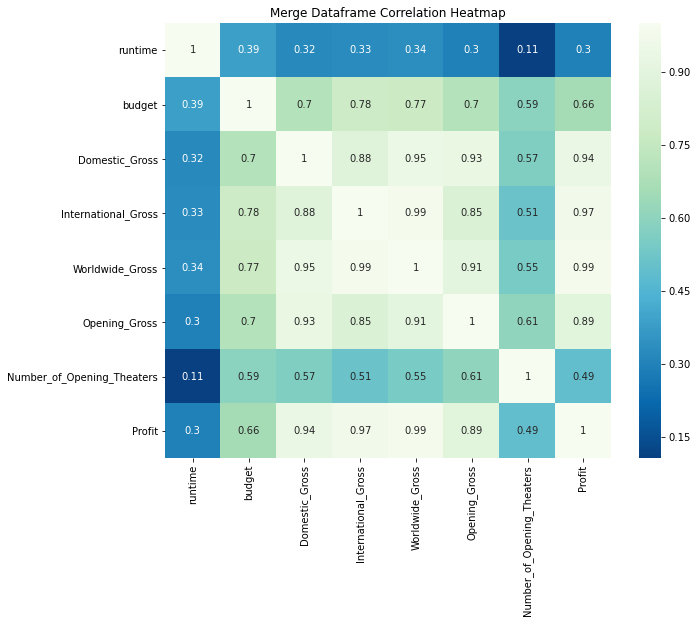

In [925]:
plt.figure(figsize=(10, 8))
plt.title('Merge Dataframe Correlation Heatmap')
mergeCorr = merge.corr()
sns.heatmap(mergeCorr, annot=True,cmap='GnBu_r')
plt.show()

This correlation heatmap is the perfect visual to display the correlations of values at a glance. The information gleamed here is valuable for further analysis. First, it can be surmised that variables with low correlation coefficients such as `runtime` to `Number_of_Opening_Theaters` are not information worth looking in to. On the other side of this issue are things with a very obvious correlation, such as `International_Gross` and `Worldwide_Gross` - it bears to reason that those few regions not included in `International_Gross` would follow with similar results. 

Some of the more interesting results that could bear further fruit in analysis would be things like how `budget` effects `runtime` or what the relationship between something like `domestic_gross` and `opening_gross` is. 

### How profitable is a movie?

A determination on what kind of movie to make hinges on the profitability of a movie, and it is important to determine exactly how profitable a movie is. To do this there must be a measure more of feature engineering, and we will devise this measure by dividing the `profit` by the `Worldwide_Gross`.

In [926]:
merge_profit = merge['Profit']
merge_WWGross = merge['Worldwide_Gross']
percent_profit = round(merge_profit/merge_WWGross, 3)*100

merge.loc[:,'Profit_Percentage'] = percent_profit

Using a mathematical determination of the profitability it is easier to surmise what will make a film profitable. Taking this measure of profitability it is much easier to sift through the data. Further, a step is taken to eliminate further extraneous data by setting the budget to a figure no less than $10,000. 

In [931]:
top_100 = merge.sort_values(by='Profit_Percentage', ascending=False)
print(len(top_100))
top_100 = top_100[top_100['budget'] >= 10000]
print(len(top_100))
# top_100 = top_100.head(100)
display(top_100.head(10))

1544
1539


,title,release_date,rating,imdb_id,tmbd_id,runtime,genres,budget,Domestic_Gross,International_Gross,Worldwide_Gross,Opening_Gross,Number_of_Opening_Theaters,Profit,Profit_Percentage
1970,Arrival,2018-12-20,PG-13,tt8259442,696430,56,[[Adventure]],10000,100546139,102842047,203388186,24074047,2317,203378186,100.0
1195,The Gallows,2015-07-10,R,tt2309260,299245,87,"[[Horror, Thriller]]",100000,22764410,20200000,42964410,9808463,2720,42864410,99.8
153,Fifty Shades of Grey,2015-02-11,R,tt2322441,216015,125,"[[Drama, Romance, Thriller]]",4000000,166167230,403484237,569651467,85171450,3646,565651467,99.3
1766,Catfish,2010-09-17,PG-13,tt1584016,42296,87,[[Documentary]],30000,3237343,296368,3533711,257285,12,3503711,99.2
797,The Devil Inside,2012-01-06,R,tt1560985,76487,83,"[[Thriller, Horror]]",1000000,53261944,48496546,101758490,33732515,2285,100758490,99.0
1459,The Quiet Ones,2014-04-01,PG-13,tt2235779,193612,98,[[Horror]],200000,8509867,9325295,17835162,3880053,2027,17635162,98.9
1836,Snow Flower and the Secret Fan,2011-07-15,PG-13,tt1541995,58882,104,"[[Drama, History]]",134005,1348205,10000000,11348205,134005,24,11214200,98.8
994,Searching,2018-08-24,PG-13,tt7668870,489999,103,"[[Thriller, Mystery, Drama]]",1000000,26020957,49441080,75462037,388769,9,74462037,98.7
827,Insidious,2010-09-13,PG-13,tt1591095,49018,103,"[[Horror, Thriller]]",1500000,54009150,45547882,99557032,13271464,2408,98057032,98.5
1021,Unfriended,2015-04-17,R,tt3713166,277685,82,"[[Horror, Thriller]]",1000000,32482090,30400000,62882090,15845115,2739,61882090,98.4


Taking a look at some of the most profitable films using the Profitability Percentage metric will allow deeper insights to be drawn into what exactly makes a film profitable. The first conclusion that can be drawn is that there is an optimum budget range that will produce the most profit.

## Optimal Budget to Maximize Profit

<img src="money_header.jpg" alt="MONEY!" style="width:500px;height:300px;">

Looking at the plot below it can be surmised that the the distribution of the data has a strongly positive skew. Taking this information and comparing it to a scatter plot will allow for further derivation of further insights to confirm ideas that can be drawn from the data. 

The scatter plot reveals a large cluster of data and betrays the few outliers that trail at the tail of the data. Working with his information an inference can be made about where our optimal budget may be derived from. This ends can be achieved with the use of a regression line, mean estimation, and confidence intervals to look where the data is most useful for estimation of the optimal budget.

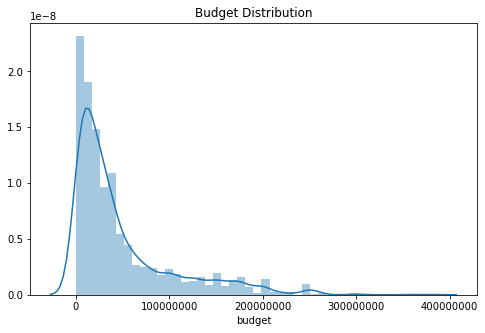

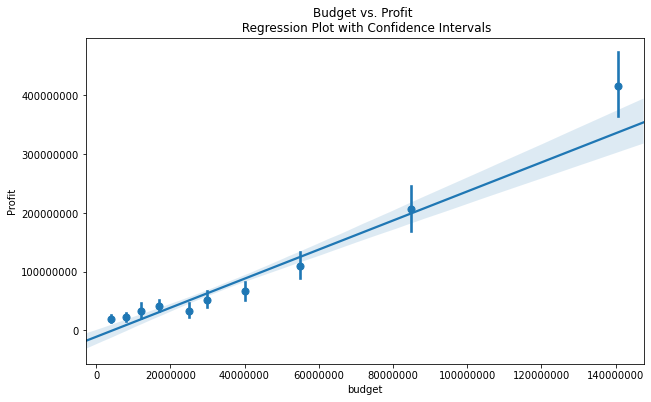

In [928]:
# top_100 = top_100.head(100)

x = top_100['budget']

plt.figure(figsize=(8, 5))
plt.title('Budget Distribution')
plt.ticklabel_format(axis='x', style='plain')
sns.distplot(x)
plt.show()

plt.figure(figsize=(10, 6))
plt.ticklabel_format(axis='both', style='plain')
plt.title('Budget vs. Profit \n Regression Plot with Confidence Intervals')
sns.regplot(x='budget', y='Profit', data=top_100, fit_reg=True, x_bins=10, x_ci='ci')
plt.show()

Now that a visualization has been established to make sense of the data it is time to look into hard numbers and compare them to our understanding of the data. Looking at the regression line and comparing it to the statistics of our data it is easy to see that the optimum budget for a film project will fall somewhere between our median value of `$31,750,000` and our mean value of `$54,938,302.98`. The expected return on these budget investments would approximately $100 million. Therefore it can be deduced that the average of these two values will provide an approximation of the optimal budget.

$$ \frac{$47,947,218.40+$27,000,000}{2} = $37,473,609.20$$

In other words this can be seen as a linear relationship between the budget and the profit. It can be confidentally assumed that, even given  films with negative profits, a profit can be turned if a sufficient budget is provided.

In [929]:
quant_50 = top_100['budget'].quantile()
quant_25 = top_100['budget'].quantile(.25)
quant_75 = top_100['budget'].quantile(.75)
mean = top_100['budget'].mean()


print(' Mean:', round(mean, 2),'\n','Lower Quartile :', quant_25, '\n', 'Median: ', quant_50, 
      '\n', 'Upper Quartile: ', quant_75)

 Mean: 47947218.4 
 Lower Quartile : 10000000.0 
 Median:  27000000.0 
 Upper Quartile:  60000000.0


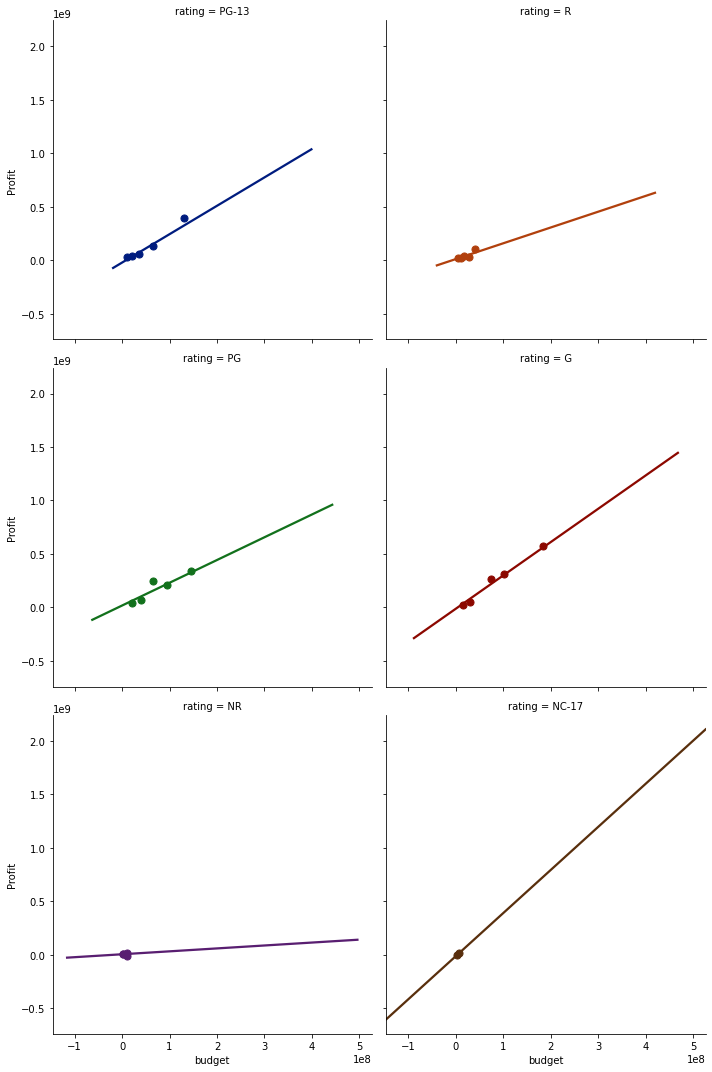

In [933]:
sns.lmplot(x='budget', y='Profit', col='rating', hue='rating', data=top_100,
          col_wrap=2, ci=None, palette='dark', height=5, fit_reg=True, x_bins=5,
          scatter_kws={"s": 50, "alpha": 1})
plt.show()

# TEST

In [623]:
merge_test = merge[merge['Profit_Percentage'] > 100]
merge_test

,title,release_date,rating,imdb_id,tmbd_id,runtime,genres,budget,Domestic_Gross,International_Gross,Worldwide_Gross,Opening_Gross,Number_of_Opening_Theaters,Profit,Profit_Percentage
1151,21 Bridges,2019-10-24,R,tt8688634,535292,99,"[[Crime, Action, Drama]]",33000000,28539757,21400000,49939757,9261268,2665,16939757,195.0
1660,The Hunt,2020-03-11,R,tt8244784,514847,90,"[[Action, Thriller, Horror]]",14000000,613308,15229966,15843274,43045,4,1843274,760.0
1337,Nobody's Fool,2018-10-31,R,tt8097306,514619,110,"[[Comedy, Romance]]",19000000,31713110,1992223,33705333,13743111,2468,14705333,129.0
1798,Hearts Beat Loud,2018-06-08,PG-13,tt7158430,470333,97,"[[Drama, Music, Comedy, Family]]",2000000,2386251,30914,2417165,74524,4,417165,479.0
1427,If Beale Street Could Talk,2018-12-14,R,tt7125860,465914,120,"[[Drama, Romance]]",12000000,14915773,5680794,20596567,224476,4,8596567,140.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
545,The A-Team,2010-06-09,PG-13,tt0429493,34544,119,"[[Thriller, Action, Adventure, Comedy, Crime]]",110000000,77222099,100016697,177238796,25669455,3535,67238796,164.0
882,Dinner for Schmucks,2010-07-30,PG-13,tt0427152,38778,114,[[Comedy]],69000000,73026337,13829402,86855739,23527839,2911,17855739,386.0
549,Cowboys & Aliens,2011-07-29,PG-13,tt0409847,49849,119,"[[Action, Science Fiction, Thriller, Western]]",163000000,100240551,74581774,174822325,36431290,3750,11822325,1379.0
362,John Carter,2012-03-07,PG-13,tt0401729,49529,132,"[[Action, Adventure, Science Fiction]]",250000000,73078100,211061000,284139100,30180188,3749,34139100,732.0


## Genre Test

In [156]:
genre_copy = film_copy.copy()

In [768]:
top_100_copy = top_100.copy()

In [769]:
def genre_slice(x):
    for genre in x:
        x = x[0]
    return x

In [770]:
top_100_copy['genres'] = top_100_copy['genres'].apply(genre_slice)

In [767]:
top_100_copy.explode('genres')

,title,release_date,rating,imdb_id,tmbd_id,runtime,genres,budget,Domestic_Gross,International_Gross,Worldwide_Gross,Opening_Gross,Number_of_Opening_Theaters,Profit,Profit_Percentage
1970,Arrival,2018-12-20,PG-13,tt8259442,696430,56,Adventure,10000,100546139,102842047,203388186,24074047,2317,203378186,100.0
1195,The Gallows,2015-07-10,R,tt2309260,299245,87,Horror,100000,22764410,20200000,42964410,9808463,2720,42864410,99.8
1195,The Gallows,2015-07-10,R,tt2309260,299245,87,Thriller,100000,22764410,20200000,42964410,9808463,2720,42864410,99.8
153,Fifty Shades of Grey,2015-02-11,R,tt2322441,216015,125,Drama,4000000,166167230,403484237,569651467,85171450,3646,565651467,99.3
153,Fifty Shades of Grey,2015-02-11,R,tt2322441,216015,125,Romance,4000000,166167230,403484237,569651467,85171450,3646,565651467,99.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1812,The Vatican Tapes,2015-07-24,R,tt1524575,157544,91,Thriller,13000000,1784763,11231001,13015764,832271,427,15764,0.1
1812,The Vatican Tapes,2015-07-24,R,tt1524575,157544,91,Horror,13000000,1784763,11231001,13015764,832271,427,15764,0.1
1043,Beautiful Creatures,2013-02-13,PG-13,tt1559547,109491,124,Fantasy,60000000,19452138,40600000,60052138,7582595,2950,52138,0.1
1043,Beautiful Creatures,2013-02-13,PG-13,tt1559547,109491,124,Drama,60000000,19452138,40600000,60052138,7582595,2950,52138,0.1


In [610]:
genre_list = []
for genre in genre_copy['genres']:
    try:
        genre_list.append(genre[0])
    except:
        genre_list.append('Missing')

genre_set = list(set(genre_list))
counts = genre_list.count(genre_set[2])

genre_dict = dict.fromkeys(genre_set)

genre_dict['Music'] = genre_list.count(genre_set[0])
genre_dict['Horror'] = genre_list.count(genre_set[1])
genre_dict['Crime'] = genre_list.count(genre_set[2])
genre_dict['History'] = genre_list.count(genre_set[3])
genre_dict['Documentary'] = genre_list.count(genre_set[4])
genre_dict['Adventure'] = genre_list.count(genre_set[5])
genre_dict['Romance'] = genre_list.count(genre_set[6])
genre_dict['Family'] = genre_list.count(genre_set[7])
genre_dict['Comedy'] = genre_list.count(genre_set[8])
genre_dict['Action'] = genre_list.count(genre_set[9])
genre_dict['War'] = genre_list.count(genre_set[10])
genre_dict['Western'] = genre_list.count(genre_set[11])
genre_dict['Science Fiction'] = genre_list.count(genre_set[12])
genre_dict['Thriller'] = genre_list.count(genre_set[13])
genre_dict['Mystery'] = genre_list.count(genre_set[14])
genre_dict['Missing'] = genre_list.count(genre_set[15])
genre_dict['Animation'] = genre_list.count(genre_set[16])
genre_dict['Fantasy'] = genre_list.count(genre_set[17])
genre_dict['Drama'] = genre_list.count(genre_set[18])




print(genre_dict)

{'Music': 7, 'Horror': 123, 'Crime': 81, 'History': 11, 'Documentary': 15, 'Adventure': 111, 'Romance': 40, 'Family': 22, 'Comedy': 305, 'Action': 316, 'War': 13, 'Western': 3, 'Science Fiction': 40, 'Thriller': 106, 'Mystery': 20, 'Missing': 1, 'Animation': 67, 'Fantasy': 31, 'Drama': 382}


In [172]:
len(film_dict)

7673

## Merge Test

In [477]:
bomFrame = pd.read_csv('Scraper_test.csv')

In [478]:
bom_frame = pd.DataFrame(bomFrame)

In [479]:
bom_frame

,Title,Domestic_Gross,International_Gross,Worldwide_Gross,Opening_Gross,Number_of_Opening_Theaters
0,Avatar,749766139,1994570654,2744336793,77025481,3452
1,Toy Story 3,415004880,651964823,1066969703,110307189,4028
2,Alice in Wonderland,334191110,691276000,1025467110,116101023,3728
3,Iron Man 2,312433331,311500000,623933331,128122480,4380
4,The Twilight Saga: Eclipse,300531751,397959596,698491347,64832191,4468
...,...,...,...,...,...,...
8314,Henchmen,1469,0,1469,580,3
8315,1945,1006193,234470,1240663,20365,2
8316,Tall Tales from the Magical Garden of Antoon K...,220,12353629,12353849,0,0
8317,Over the Limit,3243,0,3243,1402,1


In [480]:
filmJoinCopy = film.copy()

filmJoinCopy.astype({'title':'object', 'runtime':'int64'})
filmJoinCopy.drop(['revenue'], axis=1, inplace=True)

print(bom_frame.info())
print(filmJoinCopy.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8319 entries, 0 to 8318
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Title                       8319 non-null   object
 1   Domestic_Gross              8319 non-null   int64 
 2   International_Gross         8319 non-null   int64 
 3   Worldwide_Gross             8319 non-null   int64 
 4   Opening_Gross               8319 non-null   int64 
 5   Number_of_Opening_Theaters  8319 non-null   object
dtypes: int64(4), object(2)
memory usage: 390.1+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7081 entries, 0 to 7672
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   title         7081 non-null   object        
 1   release_date  7081 non-null   datetime64[ns]
 2   rating        7081 non-null   object        
 3   imdb_id       7081 non-null 

In [481]:
merge = pd.merge(left=filmJoinCopy, right=bom_frame, left_on='title', right_on='Title')

In [482]:
merge

,title,release_date,rating,imdb_id,tmbd_id,runtime,genres,budget,Title,Domestic_Gross,International_Gross,Worldwide_Gross,Opening_Gross,Number_of_Opening_Theaters
0,Avengers: Endgame,2019-04-24,PG-13,tt4154796,299534,181.0,"[[Adventure, Science Fiction, Action]]",356000000,Avengers: Endgame,858373000,1939427564,2797800564,357115007,4662
1,Avengers: Infinity War,2018-04-25,PG-13,tt4154756,299536,149.0,"[[Adventure, Action, Science Fiction]]",300000000,Avengers: Infinity War,678815482,1369544272,2048359754,257698183,4474
2,Jurassic World,2015-06-06,PG-13,tt0369610,135397,124.0,"[[Action, Adventure, Science Fiction, Thriller]]",150000000,Jurassic World,652270625,1018130012,1670400637,208806270,4274
3,The Lion King,2019-07-12,PG,tt6105098,420818,118.0,"[[Adventure, Family, Music]]",260000000,The Lion King,94242001,91300000,185542001,30151614,2330
4,The Lion King,2019-07-12,PG,tt6105098,420818,118.0,"[[Adventure, Family, Music]]",260000000,The Lion King,94242001,91300000,185542001,30151614,2330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3250,No Greater Love,2010-01-19,PG,tt1225703,31041,109.0,"[[Documentary, Romance]]",0,No Greater Love,30247,0,30247,21520,22
3251,Survival of the Dead,2010-05-06,R,tt1134854,29426,90.0,"[[Horror, Science Fiction]]",4000000,Survival of the Dead,101740,41451,143191,43757,20
3252,High School,2010-06-03,R,tt1247667,27584,99.0,[[Comedy]],0,High School,139034,82556,221590,82832,200
3253,Krystal,2018-04-13,R,tt0835802,10148,90.0,"[[Drama, Comedy]]",0,Krystal,37516,0,37516,0,0


In [483]:
merge = merge.drop(['Title'], axis=1)

In [484]:
mergeRuntimes = merge[merge['runtime'] == 0].index
merge.drop(mergeRuntimes, inplace=True)

mergeOpen = merge[merge['Number_of_Opening_Theaters'] == '('].index
merge.drop(mergeOpen, inplace=True)
mergeOpen = merge[merge['Number_of_Opening_Theaters'] == 0].index
merge.drop(mergeOpen, inplace=True)

mergeBudget = merge[merge['budget'] == 0].index
merge.drop(mergeBudget, inplace=True)

In [485]:
merge = merge.astype({'tmbd_id':'object', 'runtime':'int64','Number_of_Opening_Theaters':'int64'})

In [486]:
merge = merge.sort_values('imdb_id', ascending=False)
merge = merge.drop_duplicates(subset='imdb_id', keep='first')
merge

,title,release_date,rating,imdb_id,tmbd_id,runtime,genres,budget,Domestic_Gross,International_Gross,Worldwide_Gross,Opening_Gross,Number_of_Opening_Theaters
2471,Jexi,2019-10-10,R,tt9354944,620725,84,[[Comedy]],5000000,6546159,2406391,8952550,3106730,2332
1206,Playing with Fire,2019-11-08,PG,tt9134216,554241,96,"[[Comedy, Family]]",29900000,44451847,24179822,68631669,12723781,3125
2491,Unplanned,2019-03-21,R,tt9024106,576071,109,[[Drama]],6000000,19005109,2046806,21051915,6382298,1059
337,Knives Out,2019-11-27,PG-13,tt8946378,546554,131,"[[Mystery, Thriller, Comedy, Drama, Crime]]",40000000,165363234,143869563,309232797,26769548,3461
1173,Midsommar,2019-07-03,R,tt8772262,530385,148,"[[Horror, Drama, Mystery]]",9000000,27426361,20437004,47863365,6560030,2707
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1446,The Rum Diary,2011-10-13,R,tt0376136,23514,120,"[[Drama, Comedy]]",45000000,13109815,17025143,30134958,5135369,2273
2,Jurassic World,2015-06-06,PG-13,tt0369610,135397,124,"[[Action, Adventure, Science Fiction, Thriller]]",150000000,652270625,1018130012,1670400637,208806270,4274
1117,A Walk Among the Tombstones,2014-09-18,R,tt0365907,169917,113,"[[Crime, Drama, Mystery, Thriller]]",28000000,26307600,32526784,58834384,12758780,2712
527,The Secret Life of Walter Mitty,2013-12-18,PG,tt0359950,116745,114,"[[Adventure, Comedy, Drama, Fantasy]]",90000000,58236838,129896484,188133322,12765508,2909


In [487]:
merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1664 entries, 2471 to 1729
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   title                       1664 non-null   object        
 1   release_date                1664 non-null   datetime64[ns]
 2   rating                      1664 non-null   object        
 3   imdb_id                     1664 non-null   object        
 4   tmbd_id                     1664 non-null   object        
 5   runtime                     1664 non-null   int64         
 6   genres                      1664 non-null   object        
 7   budget                      1664 non-null   int64         
 8   Domestic_Gross              1664 non-null   int64         
 9   International_Gross         1664 non-null   int64         
 10  Worldwide_Gross             1664 non-null   int64         
 11  Opening_Gross               1664 non-null   int64    

In [488]:
mergeCorr = merge.corr()

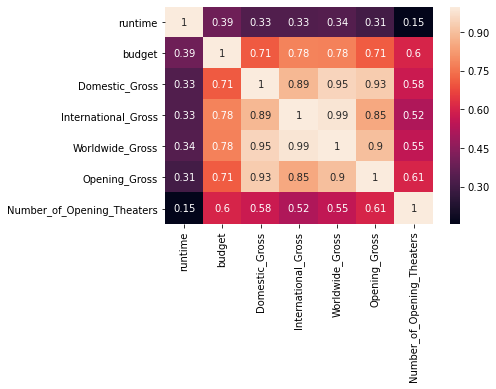

In [489]:
sns.heatmap(mergeCorr, annot=True)
plt.show()

In [490]:
merge.describe()
len(merge)
merge.isna().sum()

title                         0
release_date                  0
rating                        0
imdb_id                       0
tmbd_id                       0
runtime                       0
genres                        0
budget                        0
Domestic_Gross                0
International_Gross           0
Worldwide_Gross               0
Opening_Gross                 0
Number_of_Opening_Theaters    0
dtype: int64

In [491]:
x_array = np.array(merge['Number_of_Opening_Theaters'])
normalized_x = preprocessing.normalize([x_array])

y_array = np.array(merge['International_Gross'])
normalized_y = preprocessing.normalize([y_array])

## Plot Tests

<function matplotlib.pyplot.show(*args, **kw)>

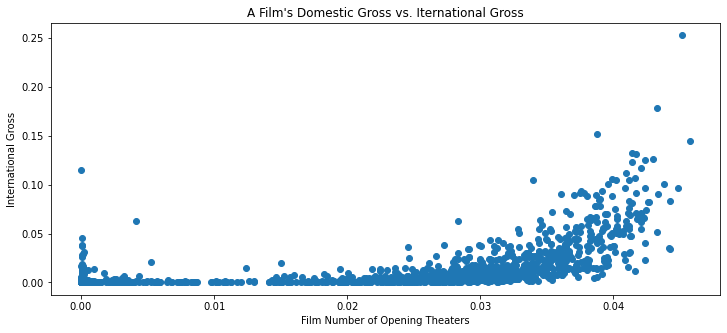

In [492]:
plt.figure(figsize=(12,5))
plt.xlabel('Film Number of Opening Theaters')
plt.ylabel('International Gross')
plt.title("A Film's Domestic Gross vs. Iternational Gross")
plt.scatter(normalized_x, normalized_y)
plt.show

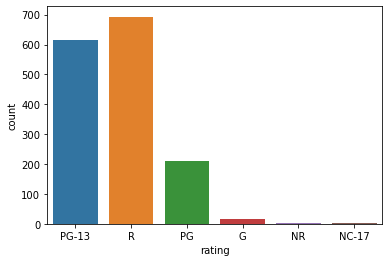

In [939]:
x = top_100['rating']
x = sns.countplot(x)

[('G', 157967670.0), ('PG', 78885527.0), ('PG-13', 47741987.5), ('R', 12793601.0)]


([<matplotlib.axis.YTick at 0x16c2a121a90>,
 <a list of 4 Text major ticklabel objects>)

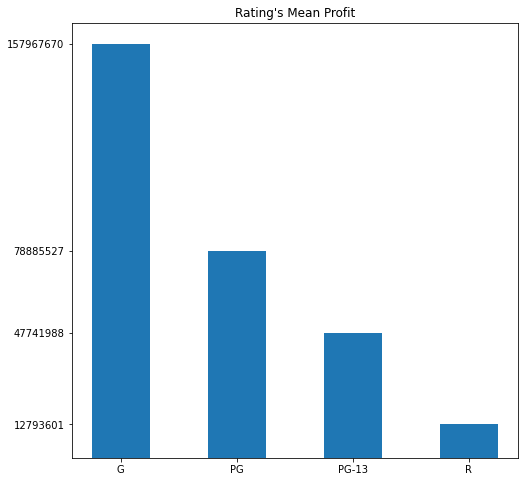

In [941]:
top_100_100 = top_100.copy()

x1 = round(top_100_100[top_100_100['rating'] == 'R']['Profit'].median(), 2)
x2 = round(top_100_100[top_100_100['rating'] == 'PG-13']['Profit'].median(), 2)
x3 = round(top_100_100[top_100_100['rating'] == 'PG']['Profit'].median(), 2)
x4 = round(top_100_100[top_100_100['rating'] == 'G']['Profit'].median(), 2)

rating_mean = {
    'R':x1,
    'PG-13':x2,
    'PG':x3,
    'G':x4
}

sort_rating = sorted(rating_mean.items(), key=lambda x: x[1], reverse=True)
print(sort_rating)

plt.figure(figsize=(8,8))
plt.title("Rating's Mean Profit")
plt.ticklabel_format(axis='y', style='plain')
labels, ys = zip(*sort_rating)
xs = np.arange(len(labels)) 
width = .5
plt.bar(xs, ys, width, align='center')
plt.xticks(xs, labels) #Replace default x-ticks with xs, then replace xs with labels
plt.yticks(ys)

In [975]:
G = top_100_100['rating'] == 'G'
over = top_100_100['Profit'] >= 100000000
 
GFrame = top_100_100[G]
over100m = GFrame[over]
over100m
# LM plot

# sns.lmplot(x='budget', y='Profit', col='rating', hue='rating', data=top_100,
#           col_wrap=2, ci=None, palette='dark', height=5, fit_reg=True, x_bins=10,
#           scatter_kws={"s": 50, "alpha": 1})
# plt.show()

C:\Users\Nero_\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


,title,release_date,rating,imdb_id,tmbd_id,runtime,genres,budget,Domestic_Gross,International_Gross,Worldwide_Gross,Opening_Gross,Number_of_Opening_Theaters,Profit,Profit_Percentage
34,Toy Story 4,2019-06-19,G,tt1979376,301528,100,"[[Adventure, Animation, Comedy, Family, Fantasy]]",175000000,434038008,639356585,1073394593,120908065,4575,898394593,83.7
191,Rio,2011-04-03,G,tt1436562,46195,96,"[[Animation, Adventure, Comedy, Family]]",90000000,143619809,340246709,483866518,39225962,3826,393866518,81.4
517,Gnomeo & Juliet,2011-01-13,G,tt0377981,45772,84,"[[Animation, Family]]",36000000,99967670,94000000,193967670,25356909,2994,157967670,81.4
35,Toy Story 3,2010-06-16,G,tt0435761,10193,103,"[[Animation, Family, Comedy]]",200000000,415004880,651964823,1066969703,110307189,4028,866969703,81.3
185,Rio 2,2014-03-19,G,tt2357291,172385,102,"[[Adventure, Comedy, Family, Animation]]",103000000,131538435,367242682,498781117,39327869,3948,395781117,79.3
295,Alvin and the Chipmunks: Chipwrecked,2011-12-14,G,tt1615918,55301,87,"[[Comedy, Fantasy, Family, Music, Animation]]",75000000,133110742,209584693,342695435,23244744,3723,267695435,78.1
98,Monsters University,2013-06-20,G,tt1453405,62211,104,"[[Animation, Family]]",200000000,268492764,475066843,743559607,82429469,4004,543559607,73.1
156,Cars 2,2011-06-11,G,tt1216475,49013,106,"[[Animation, Family, Adventure, Comedy]]",200000000,191452396,368400000,559852396,66135507,4115,359852396,64.3
401,The Peanuts Movie,2015-11-01,G,tt2452042,227973,88,"[[Adventure, Comedy, Animation, Family]]",99000000,130178411,116054702,246233113,44213073,3897,147233113,59.8
242,Cars 3,2017-06-15,G,tt3606752,260514,102,"[[Adventure, Animation, Comedy, Family]]",175000000,152901115,231029541,383930656,53688680,4256,208930656,54.4


## Misc Tests

In [494]:
merge.describe()

,runtime,budget,Domestic_Gross,International_Gross,Worldwide_Gross,Opening_Gross,Number_of_Opening_Theaters
count,1664.000000,1.664000e+03,1.664000e+03,1.664000e+03,1.664000e+03,1.664000e+03,1664.000000
mean,108.249399,4.512266e+07,5.803002e+07,8.873207e+07,1.467621e+08,1.763821e+07,2017.465745
std,16.917854,5.444037e+07,8.726840e+07,1.657440e+08,2.463569e+08,2.925731e+07,1530.594123
min,5.000000,1.000000e+00,2.640000e+02,0.000000e+00,6.630000e+02,0.000000e+00,0.000000
25%,96.000000,1.000000e+07,4.210960e+06,3.415068e+06,1.031290e+07,2.387175e+05,22.000000
50%,106.000000,2.500000e+07,2.892307e+07,2.221785e+07,5.437104e+07,8.533049e+06,2562.500000
75%,118.000000,5.600000e+07,6.961977e+07,9.233225e+07,1.621997e+08,2.131171e+07,3232.250000
max,188.000000,3.800000e+08,8.583730e+08,1.939428e+09,2.797801e+09,3.571150e+08,4725.000000


In [499]:
print(round(merge['budget'].std(),2))
print(round(merge['budget'].median(),2))
print(round(merge['budget'].mean(),2))

54440366.16
25000000.0
45122663.24


In [503]:
merge_test = merge[merge['budget'] > merge['budget'].median()]
merge_test = merge[merge['budget'] < merge['budget'].quantile(.75)]

In [504]:
merge_test

,title,release_date,rating,imdb_id,tmbd_id,runtime,genres,budget,Domestic_Gross,International_Gross,Worldwide_Gross,Opening_Gross,Number_of_Opening_Theaters
2471,Jexi,2019-10-10,R,tt9354944,620725,84,[[Comedy]],5000000,6546159,2406391,8952550,3106730,2332
1206,Playing with Fire,2019-11-08,PG,tt9134216,554241,96,"[[Comedy, Family]]",29900000,44451847,24179822,68631669,12723781,3125
2491,Unplanned,2019-03-21,R,tt9024106,576071,109,[[Drama]],6000000,19005109,2046806,21051915,6382298,1059
337,Knives Out,2019-11-27,PG-13,tt8946378,546554,131,"[[Mystery, Thriller, Comedy, Drama, Crime]]",40000000,165363234,143869563,309232797,26769548,3461
1173,Midsommar,2019-07-03,R,tt8772262,530385,148,"[[Horror, Drama, Mystery]]",9000000,27426361,20437004,47863365,6560030,2707
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1106,The Three Stooges,2012-04-13,PG,tt0383010,76489,92,[[Comedy]],30000000,44338224,10481077,54819301,17010125,3477
525,Gnomeo & Juliet,2011-01-13,G,tt0377981,45772,84,"[[Animation, Family]]",36000000,99967670,94000000,193967670,25356909,2994
1446,The Rum Diary,2011-10-13,R,tt0376136,23514,120,"[[Drama, Comedy]]",45000000,13109815,17025143,30134958,5135369,2273
1117,A Walk Among the Tombstones,2014-09-18,R,tt0365907,169917,113,"[[Crime, Drama, Mystery, Thriller]]",28000000,26307600,32526784,58834384,12758780,2712


In [505]:
merge_test = merge_test.sort_values('imdb_id', ascending=False)
merge_test = merge_test.drop_duplicates(subset='imdb_id', keep='first')
merge_test

,title,release_date,rating,imdb_id,tmbd_id,runtime,genres,budget,Domestic_Gross,International_Gross,Worldwide_Gross,Opening_Gross,Number_of_Opening_Theaters
2471,Jexi,2019-10-10,R,tt9354944,620725,84,[[Comedy]],5000000,6546159,2406391,8952550,3106730,2332
1206,Playing with Fire,2019-11-08,PG,tt9134216,554241,96,"[[Comedy, Family]]",29900000,44451847,24179822,68631669,12723781,3125
2491,Unplanned,2019-03-21,R,tt9024106,576071,109,[[Drama]],6000000,19005109,2046806,21051915,6382298,1059
337,Knives Out,2019-11-27,PG-13,tt8946378,546554,131,"[[Mystery, Thriller, Comedy, Drama, Crime]]",40000000,165363234,143869563,309232797,26769548,3461
1173,Midsommar,2019-07-03,R,tt8772262,530385,148,"[[Horror, Drama, Mystery]]",9000000,27426361,20437004,47863365,6560030,2707
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1106,The Three Stooges,2012-04-13,PG,tt0383010,76489,92,[[Comedy]],30000000,44338224,10481077,54819301,17010125,3477
525,Gnomeo & Juliet,2011-01-13,G,tt0377981,45772,84,"[[Animation, Family]]",36000000,99967670,94000000,193967670,25356909,2994
1446,The Rum Diary,2011-10-13,R,tt0376136,23514,120,"[[Drama, Comedy]]",45000000,13109815,17025143,30134958,5135369,2273
1117,A Walk Among the Tombstones,2014-09-18,R,tt0365907,169917,113,"[[Crime, Drama, Mystery, Thriller]]",28000000,26307600,32526784,58834384,12758780,2712


In [506]:
merge_test['Profit'] = merge_test['Worldwide_Gross'] - merge_test['budget']

In [508]:
profit = merge_test[merge_test['Profit'] > 0]

In [625]:
profit['Percent_Profit'] = round(profit['Profit'] / profit['Worldwide_Gross'], 3)*100
profit

C:\Users\Nero_\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,title,release_date,rating,imdb_id,tmbd_id,runtime,genres,budget,Domestic_Gross,International_Gross,Worldwide_Gross,Opening_Gross,Number_of_Opening_Theaters,Profit,Percent Profit,Percent_Profit
2471,Jexi,2019-10-10,R,tt9354944,620725,84,[[Comedy]],5000000,6546159,2406391,8952550,3106730,2332,3952550,127.0,44.1
1206,Playing with Fire,2019-11-08,PG,tt9134216,554241,96,"[[Comedy, Family]]",29900000,44451847,24179822,68631669,12723781,3125,38731669,77.0,56.4
2491,Unplanned,2019-03-21,R,tt9024106,576071,109,[[Drama]],6000000,19005109,2046806,21051915,6382298,1059,15051915,40.0,71.5
337,Knives Out,2019-11-27,PG-13,tt8946378,546554,131,"[[Mystery, Thriller, Comedy, Drama, Crime]]",40000000,165363234,143869563,309232797,26769548,3461,269232797,15.0,87.1
1173,Midsommar,2019-07-03,R,tt8772262,530385,148,"[[Horror, Drama, Mystery]]",9000000,27426361,20437004,47863365,6560030,2707,38863365,23.0,81.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1010,The Giver,2014-08-11,PG-13,tt0435651,227156,94,"[[Drama, Science Fiction]]",25000000,45090374,21890082,66980456,12305016,3003,41980456,60.0,62.7
903,The Possession,2012-08-30,PG-13,tt0431021,77883,92,"[[Horror, Thriller]]",14000000,49130154,36315921,85446075,17732480,2816,71446075,20.0,83.6
1106,The Three Stooges,2012-04-13,PG,tt0383010,76489,92,[[Comedy]],30000000,44338224,10481077,54819301,17010125,3477,24819301,121.0,45.3
525,Gnomeo & Juliet,2011-01-13,G,tt0377981,45772,84,"[[Animation, Family]]",36000000,99967670,94000000,193967670,25356909,2994,157967670,23.0,81.4


In [512]:
print(round(profit['Profit'].mean(), 2))
print(round(profit['Profit'].median(), 2))
print(round(profit['Profit'].std(), 2))

63492668.88
35043471.5
87778153.28
